# Preregistered Analysis: More In-Depth Analysis of Launch Angle
In our exploratory data analysis, we noticed that launch angle average did not have a high correlation coefficient with offensive value stats such as OPS+ and wRC+. We think this is because there is an ideal numerical range of average launch angles for peak offensive performance.
Over the past few years, there has been a major emphasis on changing the type of swing a batter would use to optimize their success, away from the traditional flat or even downwards-angled swing used to generate line drives, balls hit with a launch angle between 10 and 25 degrees, to a swing emphasizing flyballs, balls hit with a launch angle between 25 and 50 degrees (https://www.si.com/mlb/2018/03/21/evolution-swing-home-run-opening-day).  
To test our hypothesis that launch angle affects offensive performance, we ran linear regressions on average launch angle and each of our three major offensive value stats. The goal was to see if there was a regression score that would show some connection between increasing launch angle and offensive performance. We see that there is little to no relation between ranges of average launch angle and performance.


In [60]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [61]:
data_2019 = pd.read_csv('2019_statcast_data_final.csv')
data_2018 = pd.read_csv('2018_statcast_data_final.csv')
data_2017 = pd.read_csv('2017_statcast_data_final.csv')
data_2016 = pd.read_csv('2016_statcast_data_final.csv')
data_2015 = pd.read_csv('2015_statcast_data_final.csv')

In [62]:
def launch_angle_avg_quartile(n):
    if(n >= q0 and n <= q1):
        return 1
    if(n >= q1 and n <=q2):
        return 2
    if(n >= q2 and n <= q3):
        return 3
    if(n >= q3 and n <= q4):
        return 4

# 2019 Analysis

The boxplot emphasizes how the middle quartiles, despite having a range of only 5 degrees, account for 50% of all average launch angles, the total range of which is almost 5 times that.  
As expected, there is a positive slope to the regression lines. However, the r-squared values of between 0.06 and 0.066 show little to no relation. This is easy to see in any of the graphs using quartiles, which uses a categorical variable based on quartile. The range of offensive performance in each quartile is too large to there to be any significant difference between two quartiles.

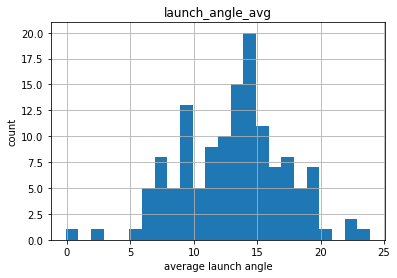

In [63]:
data_2019.hist(column='launch_angle_avg', bins = math.ceil(data_2019['launch_angle_avg'].max() - data_2019['launch_angle_avg'].min()))
plt.xlabel('average launch angle')
plt.ylabel('count')
plt.show()

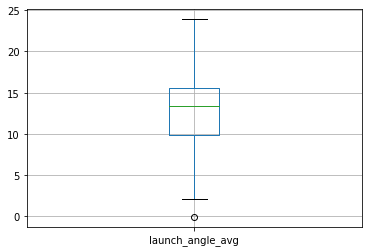

In [64]:
data_2019.boxplot(column='launch_angle_avg')
plt.show()

In [65]:
q0 = data_2019['launch_angle_avg'].quantile(0)
q1 = data_2019['launch_angle_avg'].quantile(0.25)
q2 = data_2019['launch_angle_avg'].quantile(0.5)
q3 = data_2019['launch_angle_avg'].quantile(0.75)
q4 = data_2019['launch_angle_avg'].quantile(1)

test = map(launch_angle_avg_quartile, data_2019['launch_angle_avg'])
test_list = list(test)

data_2019['launch_quartile'] = test_list

wRC+ Model
Predictor: launch angle avg quartile
Regression Slope: 4.815587362541458
R-squared: 0.059275818153434856



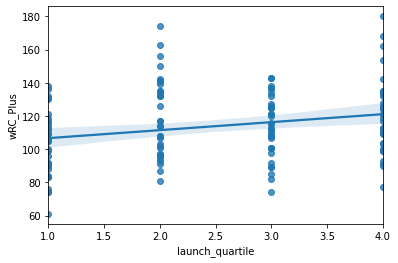

wRC+ Model
Predictor: launch angle avg
Regression Slope: 1.5348982555588562
R-squared: 0.07995509984479932



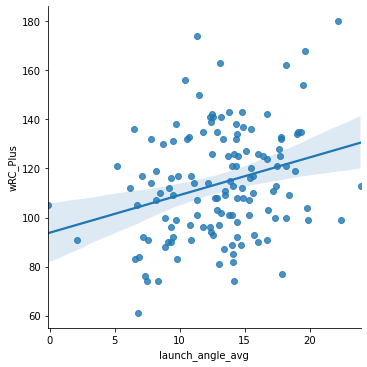

In [66]:
wRC_model_2019 = LinearRegression().fit(data_2019[['launch_quartile']], data_2019[['wRC_Plus']])
print('wRC+ Model\nPredictor: launch angle avg quartile\nRegression Slope: {}\nR-squared: {}\n'.format(wRC_model_2019.coef_[0][0], wRC_model_2019.score(data_2019[['launch_quartile']], data_2019[['wRC_Plus']])))

sns.regplot(x="launch_quartile", y="wRC_Plus", data=data_2019)
plt.show()

wRC_model_2019_2 = LinearRegression().fit(data_2019[['launch_angle_avg']], data_2019[['wRC_Plus']])
print('wRC+ Model\nPredictor: launch angle avg\nRegression Slope: {}\nR-squared: {}\n'.format(wRC_model_2019_2.coef_[0][0], wRC_model_2019_2.score(data_2019[['launch_angle_avg']], data_2019[['wRC_Plus']])))

sns.lmplot(x="launch_angle_avg", y="wRC_Plus", data=data_2019)
plt.show()

OPS+ model
Predictor: launch angle avg quartile
Regression Slope: 4.892302321522083
R-squared: 0.06097813889573045



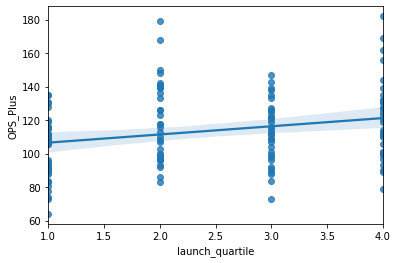

OPS+ model
Predictor: launch angle avg
Regression Slope: 1.5893971281399075
R-squared: 0.08545163957408564



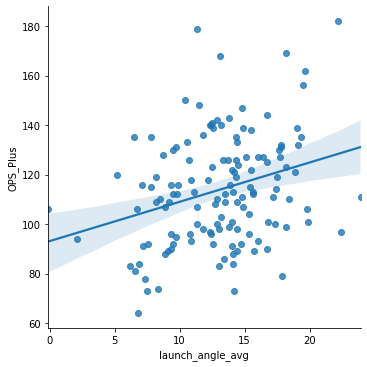

In [67]:
OPS_model_2019 = LinearRegression().fit(data_2019[['launch_quartile']], data_2019[['OPS_Plus']])
print('OPS+ model\nPredictor: launch angle avg quartile\nRegression Slope: {}\nR-squared: {}\n'.format(OPS_model_2019.coef_[0][0], OPS_model_2019.score(data_2019[['launch_quartile']], data_2019[['OPS_Plus']])))

sns.regplot(x="launch_quartile", y="OPS_Plus", data=data_2019)
plt.show()

OPS_model_2019_2 = LinearRegression().fit(data_2019[['launch_angle_avg']], data_2019[['OPS_Plus']])
print('OPS+ model\nPredictor: launch angle avg\nRegression Slope: {}\nR-squared: {}\n'.format(OPS_model_2019_2.coef_[0][0], OPS_model_2019_2.score(data_2019[['launch_angle_avg']], data_2019[['OPS_Plus']])))

sns.lmplot(x="launch_angle_avg", y="OPS_Plus", data=data_2019)
plt.show()

xWOBA model
Predictor: launch angle avg quartile
Regression Slope: 0.007635887589457149
R-squared: 0.06608844901516497



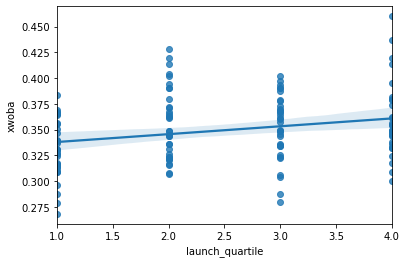

xWOBA model
Predictor: launch angle avg
Regression Slope: 0.002635798882631622
R-squared: 0.10455360364277311



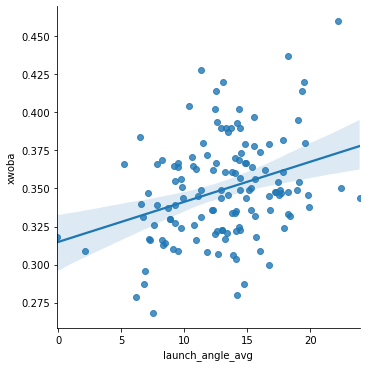

In [68]:
xWOBA_model_2019 = LinearRegression().fit(data_2019[['launch_quartile']], data_2019[['xwoba']])
print('xWOBA model\nPredictor: launch angle avg quartile\nRegression Slope: {}\nR-squared: {}\n'.format(xWOBA_model_2019.coef_[0][0], xWOBA_model_2019.score(data_2019[['launch_quartile']], data_2019[['xwoba']])))

sns.regplot(x="launch_quartile", y="xwoba", data=data_2019)
plt.show()

xWOBA_model_2019_2 = LinearRegression().fit(data_2019[['launch_angle_avg']], data_2019[['xwoba']])
print('xWOBA model\nPredictor: launch angle avg\nRegression Slope: {}\nR-squared: {}\n'.format(xWOBA_model_2019_2.coef_[0][0], xWOBA_model_2019_2.score(data_2019[['launch_angle_avg']], data_2019[['xwoba']])))

sns.lmplot(x="launch_angle_avg", y="xwoba", data=data_2019)
plt.show()

In [69]:
#these plots mapped exit velocity to each quartile of launch angles and they all looked like scatterplots except one (2018 q3)

#sns.lmplot(x="exit_velocity_avg", y="wRC_Plus", hue = 'launch_quartile', data=data_2019[data_2019['launch_quartile'] == 1]);
#sns.lmplot(x="exit_velocity_avg", y="wRC_Plus", hue = 'launch_quartile', data=data_2019[data_2019['launch_quartile'] == 2]);
#sns.lmplot(x="exit_velocity_avg", y="wRC_Plus", hue = 'launch_quartile', data=data_2019[data_2019['launch_quartile'] == 3]);
#sns.lmplot(x="exit_velocity_avg", y="wRC_Plus", hue = 'launch_quartile', data=data_2019[data_2019['launch_quartile'] == 4]);

# 2018 Analysis

Similarly to 2019, the R-squared scores for the regressions involving quartiles were very small, even lower than before, showing little to no relation. There was still a positive slope, and like 2019 the boxplot shows that about half of the players we sampled had an average launch angle in a small range, 5-6 degrees.  
One additional analysis that we performed was a regression of average exit velocity, how hard the ball was hit, against offensive performance, for each subset of launch angle quartiles. We did not show the majority of those plots, because it was 60 or so very similar-looking plots, but one that showed significance, the 3rd quartile of launch angles for 2018, is shown below.

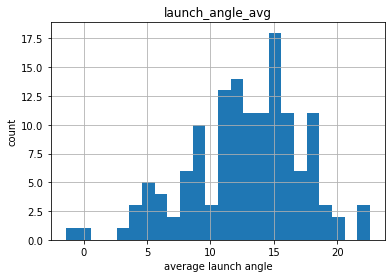

In [70]:
data_2018 = data_2018.head(139)
data_2018.hist(column='launch_angle_avg', bins = math.ceil(data_2018['launch_angle_avg'].max() - data_2018['launch_angle_avg'].min()))
plt.xlabel('average launch angle')
plt.ylabel('count')
plt.show()

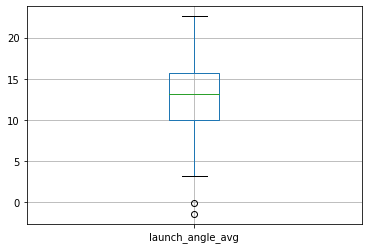

In [71]:
data_2018.boxplot(column='launch_angle_avg')
plt.show()

In [72]:
q0 = data_2018['launch_angle_avg'].quantile(0)
q1 = data_2018['launch_angle_avg'].quantile(0.25)
q2 = data_2018['launch_angle_avg'].quantile(0.5)
q3 = data_2018['launch_angle_avg'].quantile(0.75)
q4 = data_2018['launch_angle_avg'].quantile(1)

dummy_2018 = map(launch_angle_avg_quartile, data_2018['launch_angle_avg'])
dummy_2018 = list(dummy_2018)
data_2018['launch_quartile'] = dummy_2018

wRC+ model
Predictor: launch angle avg quartile
Regression Slope: 3.885254194418684
R-squared: 0.03520633373651294



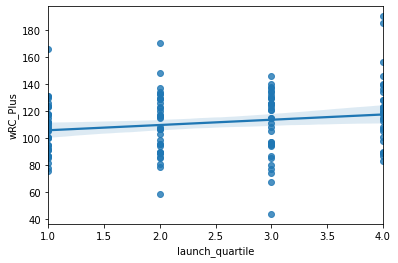

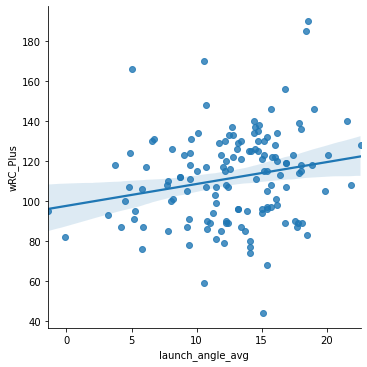

In [73]:
wRC_model_2018 = LinearRegression().fit(data_2018[['launch_quartile']], data_2018[['wRC_Plus']])
print('wRC+ model\nPredictor: launch angle avg quartile\nRegression Slope: {}\nR-squared: {}\n'.format(wRC_model_2018.coef_[0][0], wRC_model_2018.score(data_2018[['launch_quartile']], data_2018[['wRC_Plus']])))

sns.regplot(x="launch_quartile", y="wRC_Plus", data=data_2018)
plt.show()
sns.lmplot(x="launch_angle_avg", y="wRC_Plus", data=data_2018)
plt.show()

OPS+ model
Predictor: launch angle avg quartile
Regression Slope: 4.368982379226035
R-squared: 0.04563085094069752



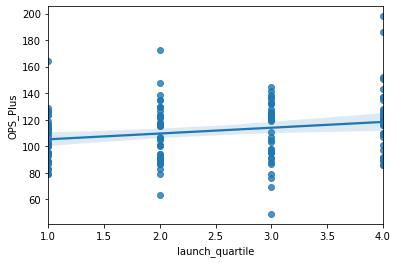

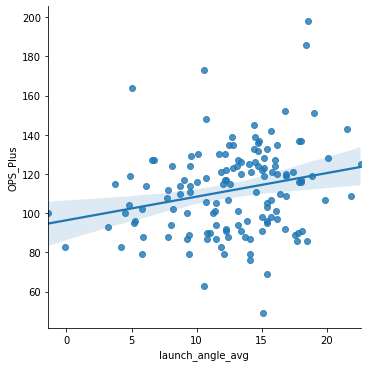

In [74]:
OPS_model_2018 = LinearRegression().fit(data_2018[['launch_quartile']], data_2018[['OPS_Plus']])
print('OPS+ model\nPredictor: launch angle avg quartile\nRegression Slope: {}\nR-squared: {}\n'.format(OPS_model_2018.coef_[0][0], OPS_model_2018.score(data_2018[['launch_quartile']], data_2018[['OPS_Plus']])))

sns.regplot(x="launch_quartile", y="OPS_Plus", data=data_2018)
plt.show()
sns.lmplot(x="launch_angle_avg", y="OPS_Plus", data=data_2018)
plt.show()

xWOBA model
Predictor: launch angle avg quartile
Regression Slope: 0.005210564033386729
R-squared: 0.02948556707527006



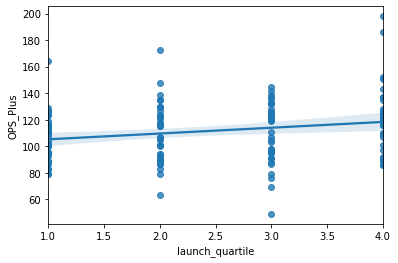

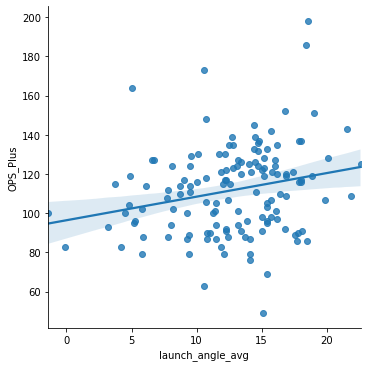

In [75]:
xWOBA_model_2018 = LinearRegression().fit(data_2018[['launch_quartile']], data_2018[['xwoba']])
print('xWOBA model\nPredictor: launch angle avg quartile\nRegression Slope: {}\nR-squared: {}\n'.format(xWOBA_model_2018.coef_[0][0], xWOBA_model_2018.score(data_2018[['launch_quartile']], data_2018[['xwoba']])))

sns.regplot(x="launch_quartile", y="OPS_Plus", data=data_2018)
plt.show()
sns.lmplot(x="launch_angle_avg", y="OPS_Plus", data=data_2018)
plt.show()

In [76]:
#sns.lmplot(x="exit_velocity_avg", y="wRC_Plus", hue = 'launch_quartile', data=data_2018[data_2018['launch_quartile'] == 1]);
#sns.lmplot(x="exit_velocity_avg", y="wRC_Plus", hue = 'launch_quartile', data=data_2018[data_2018['launch_quartile'] == 2]);
#sns.lmplot(x="exit_velocity_avg", y="wRC_Plus", hue = 'launch_quartile', data=data_2018[data_2018['launch_quartile'] == 4]);

## 3rd Quartile of Launch Angles, regression of average exit velocity versus offensive performance.  
The R-Squared value of this regression is 0.3, which we would consider significant. However, because this was only one of the many attempts that showed significance, the overall hypothesis that an increase of exit velocity would increase performance for specific subsets of launch angle quartiles was not true.

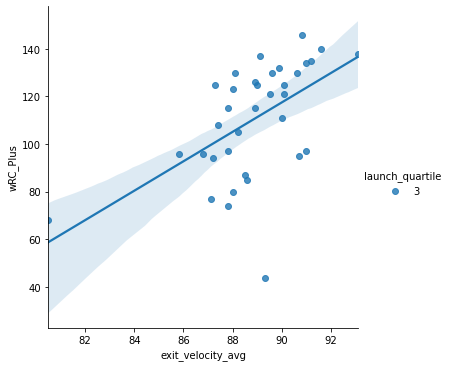

In [77]:
sns.lmplot(x="exit_velocity_avg", y="wRC_Plus", hue = 'launch_quartile', data=data_2018[data_2018['launch_quartile'] == 3]);

In [78]:
#data_2018[data_2018['launch_quartile'] == 3]

In [79]:
#this is how to do a regression with just the one quartile and exit velo

wRC_model_2018_test = LinearRegression().fit(data_2018[data_2018['launch_quartile'] == 3][['exit_velocity_avg']], data_2018[data_2018['launch_quartile'] == 3]['wRC_Plus'])
print('Predictor: launch angle\nRegression Slope: {}\nR-squared: {}\n'.format(wRC_model_2018_test.coef_[0], wRC_model_2018_test.score(data_2018[data_2018['launch_quartile'] == 3][['exit_velocity_avg']], data_2018[data_2018['launch_quartile'] == 3]['wRC_Plus'])))

Predictor: launch angle
Regression Slope: 6.179710028836911
R-squared: 0.3029750723719338



# 2017 Analysis

2017 shows more of the same. The boxplot remains similar, and the regression scores remain low.

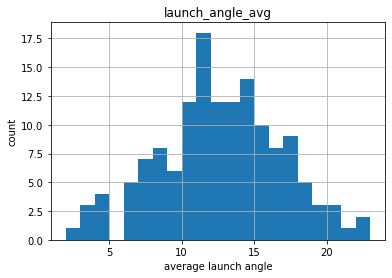

In [80]:
data_2017.hist(column='launch_angle_avg', bins = math.ceil(data_2017['launch_angle_avg'].max() - data_2017['launch_angle_avg'].min()))
plt.xlabel('average launch angle')
plt.ylabel('count')
plt.show()

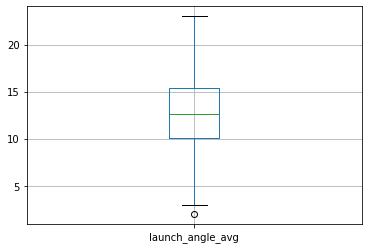

In [81]:
boxplot_2017 = data_2017.boxplot(column='launch_angle_avg')
plt.show()

In [82]:
q0 = data_2017['launch_angle_avg'].quantile(0)
q1 = data_2017['launch_angle_avg'].quantile(0.25)
q2 = data_2017['launch_angle_avg'].quantile(0.5)
q3 = data_2017['launch_angle_avg'].quantile(0.75)
q4 = data_2017['launch_angle_avg'].quantile(1)

dummy_2017 = map(launch_angle_avg_quartile, data_2017['launch_angle_avg'])
data_2017['launch_quartile'] = list(dummy_2017)
#data_2017.head()


wRC+ model
Predictor: launch angle avg quartile
Regression Slope: 4.163613975681083
R-squared: 0.040187167377598976



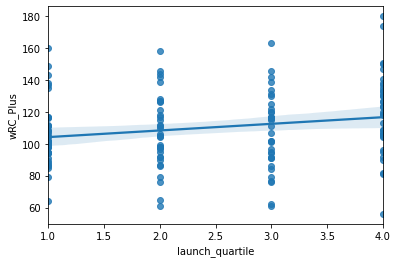

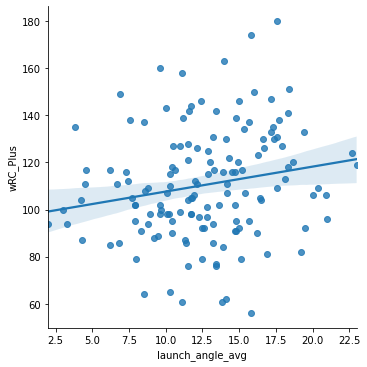

In [83]:
wRC_model_2017 = LinearRegression().fit(data_2017[['launch_quartile']], data_2017[['wRC_Plus']])
print('wRC+ model\nPredictor: launch angle avg quartile\nRegression Slope: {}\nR-squared: {}\n'.format(wRC_model_2017.coef_[0][0], wRC_model_2017.score(data_2017[['launch_quartile']], data_2017[['wRC_Plus']])))

sns.regplot(x="launch_quartile", y="wRC_Plus", data=data_2017)
plt.show()
sns.lmplot(x="launch_angle_avg", y="wRC_Plus", data=data_2017)
plt.show()

OPS+ model
Predictor: launch angle avg quartile
Regression Slope: 4.2139833769432045
R-squared: 0.04232233538716923



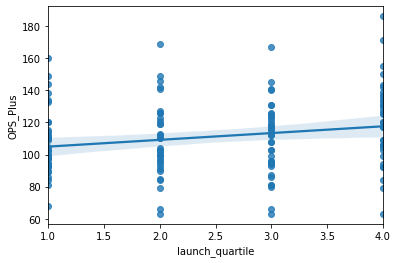

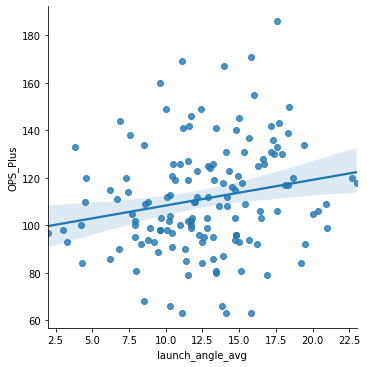

In [84]:
OPS_model_2017 = LinearRegression().fit(data_2017[['launch_quartile']], data_2017[['OPS_Plus']])
print('OPS+ model\nPredictor: launch angle avg quartile\nRegression Slope: {}\nR-squared: {}\n'.format(OPS_model_2017.coef_[0][0], OPS_model_2017.score(data_2017[['launch_quartile']], data_2017[['OPS_Plus']])))

sns.regplot(x="launch_quartile", y="OPS_Plus", data=data_2017)
plt.show()
sns.lmplot(x="launch_angle_avg", y="OPS_Plus", data=data_2017)
plt.show()

xWOBA model
Predictor: launch angle avg quartile
Regression Slope: 0.005546136678466984
R-squared: 0.03357125713636788



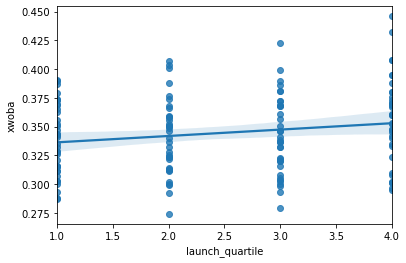

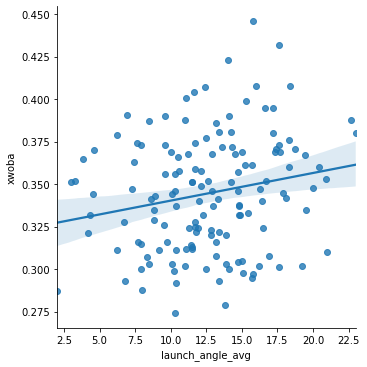

In [85]:
xWOBA_model_2017 = LinearRegression().fit(data_2017[['launch_quartile']], data_2017[['xwoba']])
print('xWOBA model\nPredictor: launch angle avg quartile\nRegression Slope: {}\nR-squared: {}\n'.format(xWOBA_model_2017.coef_[0][0], xWOBA_model_2017.score(data_2017[['launch_quartile']], data_2017[['xwoba']])))

sns.regplot(x="launch_quartile", y="xwoba", data=data_2017)
plt.show()
sns.lmplot(x="launch_angle_avg", y="xwoba", data=data_2017)
plt.show()

In [86]:
#sns.lmplot(x="exit_velocity_avg", y="wRC_Plus", hue = 'launch_quartile', data=data_2017[data_2017['launch_quartile'] == 1]);
#sns.lmplot(x="exit_velocity_avg", y="wRC_Plus", hue = 'launch_quartile', data=data_2017[data_2017['launch_quartile'] == 2]);
#sns.lmplot(x="exit_velocity_avg", y="wRC_Plus", hue = 'launch_quartile', data=data_2017[data_2017['launch_quartile'] == 3]);
#sns.lmplot(x="exit_velocity_avg", y="wRC_Plus", hue = 'launch_quartile', data=data_2017[data_2017['launch_quartile'] == 4]);

# 2016 Analysis

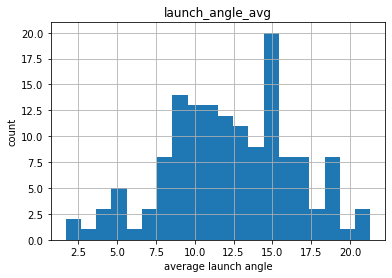

In [87]:
data_2016.hist(column='launch_angle_avg', bins = math.ceil(data_2016['launch_angle_avg'].max() - data_2016['launch_angle_avg'].min()))
plt.xlabel('average launch angle')
plt.ylabel('count')
plt.show()

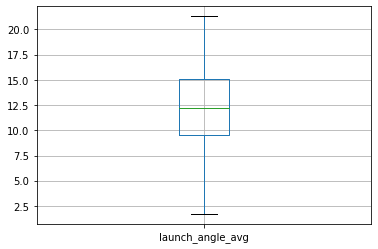

In [88]:
data_2016.boxplot(column='launch_angle_avg')
plt.show()

In [89]:
q0 = data_2016['launch_angle_avg'].quantile(0)
q1 = data_2016['launch_angle_avg'].quantile(0.25)
q2 = data_2016['launch_angle_avg'].quantile(0.5)
q3 = data_2016['launch_angle_avg'].quantile(0.75)
q4 = data_2016['launch_angle_avg'].quantile(1)

dummy_2016 = map(launch_angle_avg_quartile, data_2016['launch_angle_avg'])
data_2016['launch_quartile'] = list(dummy_2016)

wRC_model_2016 = LinearRegression().fit(data_2016[['launch_quartile']], data_2016[['wRC_Plus']])
print('wRC+ model\nPredictor: launch angle avg quartile\nRegression Slope: {}\nR-squared: {}\n'.format(wRC_model_2016.coef_[0][0], wRC_model_2016.score(data_2016[['launch_quartile']], data_2016[['wRC_Plus']])))

wRC+ model
Predictor: launch angle avg quartile
Regression Slope: 4.24390243902439
R-squared: 0.05315623869002373



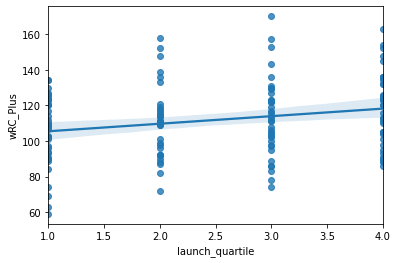

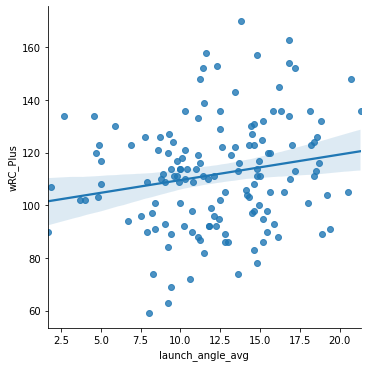

In [90]:
sns.regplot(x="launch_quartile", y="wRC_Plus", data=data_2016)
plt.show()
sns.lmplot(x="launch_angle_avg", y="wRC_Plus", data=data_2016)
plt.show()

In [91]:
#sns.lmplot(x="exit_velocity_avg", y="wRC_Plus", hue = 'launch_quartile', data=data_2016[data_2016['launch_quartile'] == 1]);
#sns.lmplot(x="exit_velocity_avg", y="wRC_Plus", hue = 'launch_quartile', data=data_2016[data_2016['launch_quartile'] == 2]);
#sns.lmplot(x="exit_velocity_avg", y="wRC_Plus", hue = 'launch_quartile', data=data_2016[data_2016['launch_quartile'] == 3]);
#sns.lmplot(x="exit_velocity_avg", y="wRC_Plus", hue = 'launch_quartile', data=data_2016[data_2016['launch_quartile'] == 4]);

OPS+ model
Predictor: launch angle avg quartile
Regression Slope: 4.303523035230351
R-squared: 0.05634515774470583



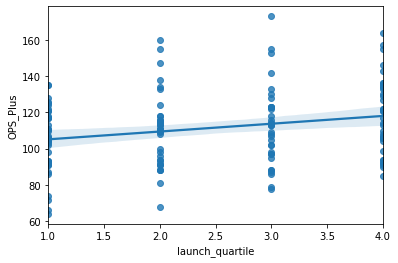

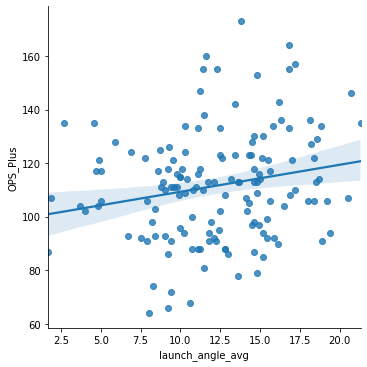

In [92]:
OPS_model_2016 = LinearRegression().fit(data_2016[['launch_quartile']], data_2016[['OPS_Plus']])
print('OPS+ model\nPredictor: launch angle avg quartile\nRegression Slope: {}\nR-squared: {}\n'.format(OPS_model_2016.coef_[0][0], OPS_model_2016.score(data_2016[['launch_quartile']], data_2016[['OPS_Plus']])))

sns.regplot(x="launch_quartile", y="OPS_Plus", data=data_2016)
plt.show()
sns.lmplot(x="launch_angle_avg", y="OPS_Plus", data=data_2016)
plt.show()

xWOBA model
Predictor: launch angle avg quartile
Regression Slope: 0.006498644986449865
R-squared: 0.044705707479595014



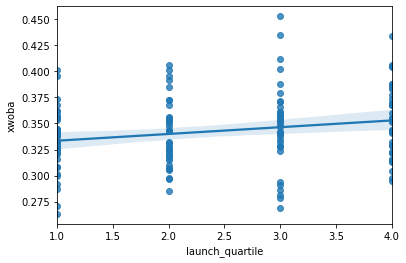

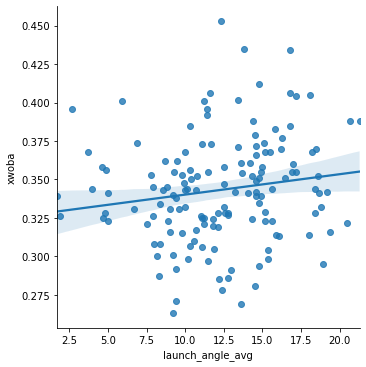

In [93]:
xWOBA_model_2016 = LinearRegression().fit(data_2016[['launch_quartile']], data_2016[['xwoba']])
print('xWOBA model\nPredictor: launch angle avg quartile\nRegression Slope: {}\nR-squared: {}\n'.format(xWOBA_model_2016.coef_[0][0], xWOBA_model_2016.score(data_2016[['launch_quartile']], data_2016[['xwoba']])))

sns.regplot(x="launch_quartile", y="xwoba", data=data_2016)
plt.show()
sns.lmplot(x="launch_angle_avg", y="xwoba", data=data_2016)
plt.show()

# 2015 Analysis

2015 showed the highest regression score of this entire analysis, a R-Squared score of 0.074 with xWOBA. This being the highest regression score does not bode well for our hypothesis. There is nothing else new or different to note in this year of analysis

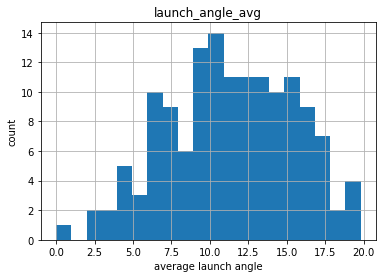

In [94]:
data_2015.hist(column='launch_angle_avg', bins = math.ceil(data_2015['launch_angle_avg'].max() - data_2015['launch_angle_avg'].min()))
plt.xlabel('average launch angle')
plt.ylabel('count')
plt.show()

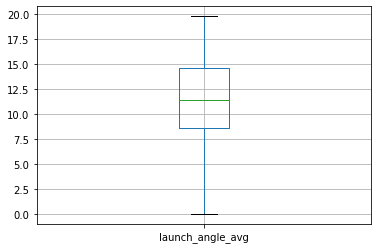

In [95]:
boxplot_2015 = data_2015.boxplot(column='launch_angle_avg')
plt.show()

In [96]:
q0 = data_2015['launch_angle_avg'].quantile(0)
q1 = data_2015['launch_angle_avg'].quantile(0.25)
q2 = data_2015['launch_angle_avg'].quantile(0.5)
q3 = data_2015['launch_angle_avg'].quantile(0.75)
q4 = data_2015['launch_angle_avg'].quantile(1)

dummy_2015 = map(launch_angle_avg_quartile, data_2015['launch_angle_avg'])
data_2015['launch_quartile'] = list(dummy_2015)

wRC+ model
Predictor: launch angle avg quartile
Regression Slope: 5.04424568624347
R-squared: 0.05726549670818393



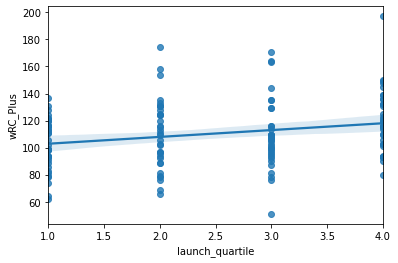

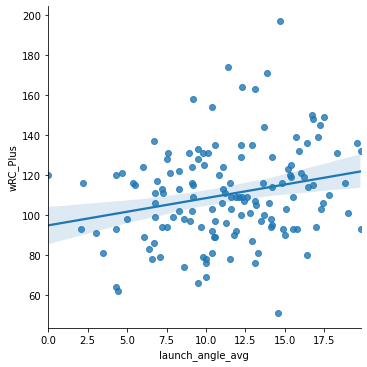

In [97]:
wRC_model_2015 = LinearRegression().fit(data_2015[['launch_quartile']], data_2015[['wRC_Plus']])
print('wRC+ model\nPredictor: launch angle avg quartile\nRegression Slope: {}\nR-squared: {}\n'.format(wRC_model_2015.coef_[0][0], wRC_model_2015.score(data_2015[['launch_quartile']], data_2015[['wRC_Plus']])))

sns.regplot(x="launch_quartile", y="wRC_Plus", data=data_2015)
plt.show()
sns.lmplot(x="launch_angle_avg", y="wRC_Plus", data=data_2015)
plt.show()

OPS+ model
Predictor: launch angle avg quartile
Regression Slope: 5.049707139464936
R-squared: 0.060095140844858674



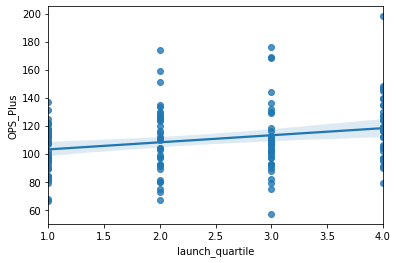

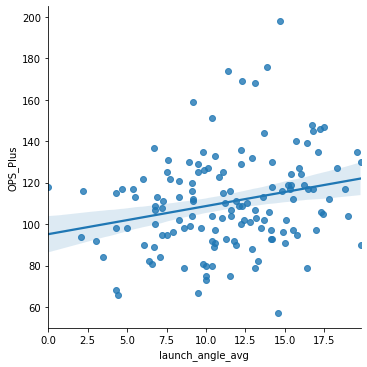

In [98]:
OPS_model_2015 = LinearRegression().fit(data_2015[['launch_quartile']], data_2015[['OPS_Plus']])
print('OPS+ model\nPredictor: launch angle avg quartile\nRegression Slope: {}\nR-squared: {}\n'.format(OPS_model_2015.coef_[0][0], OPS_model_2015.score(data_2015[['launch_quartile']], data_2015[['OPS_Plus']])))

sns.regplot(x="launch_quartile", y="OPS_Plus", data=data_2015)
plt.show()
sns.lmplot(x="launch_angle_avg", y="OPS_Plus", data=data_2015)
plt.show()

xWOBA model
Predictor: launch angle
Regression Slope: 0.009014445148013294
R-squared: 0.07367005936847748



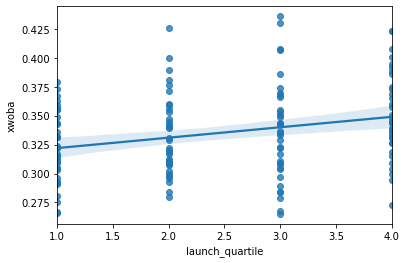

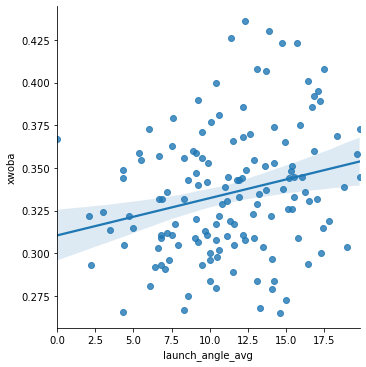

In [99]:
xWOBA_model_2015 = LinearRegression().fit(data_2015[['launch_quartile']], data_2015[['xwoba']])
print('xWOBA model\nPredictor: launch angle\nRegression Slope: {}\nR-squared: {}\n'.format(xWOBA_model_2015.coef_[0][0], xWOBA_model_2015.score(data_2015[['launch_quartile']], data_2015[['xwoba']])))

sns.regplot(x="launch_quartile", y="xwoba", data=data_2015)
plt.show()
sns.lmplot(x="launch_angle_avg", y="xwoba", data=data_2015)
plt.show()

# 2015-2019 (All years combined) Analysis

We also tried doing the regressions when all of the data had been combined and then separated into quartiles, like in the analysis for individual years. It is clear to see that there is a positive slope 

In [100]:
all_dfs = [data_2015,data_2016,data_2017,data_2018,data_2019]
all_data = pd.concat(all_dfs).reset_index(drop=True)

q0 = all_data['launch_angle_avg'].quantile(0)
q1 = all_data['launch_angle_avg'].quantile(0.25)
q2 = all_data['launch_angle_avg'].quantile(0.5)
q3 = all_data['launch_angle_avg'].quantile(0.75)
q4 = all_data['launch_angle_avg'].quantile(1)

dummy_all = map(launch_angle_avg_quartile, all_data['launch_angle_avg'])
all_data['launch_quartile'] = list(dummy_all)

wRC+ model
Predictor: launch angle avg quartile
Regression Slope: 4.3948792355728
R-squared: 0.04737495317219864



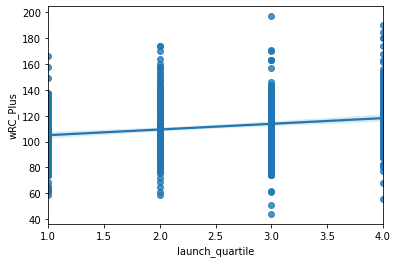

wRC+ model
Predictor: launch angle
Regression Slope: 1.199656093370689
R-squared: 0.05007331157104544



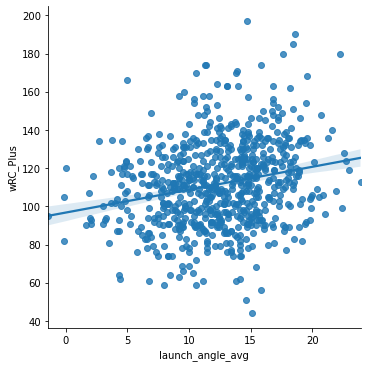

In [101]:
wRC_model_all = LinearRegression().fit(all_data[['launch_quartile']], all_data[['wRC_Plus']])
print('wRC+ model\nPredictor: launch angle avg quartile\nRegression Slope: {}\nR-squared: {}\n'.format(wRC_model_all.coef_[0][0], wRC_model_all.score(all_data[['launch_quartile']], all_data[['wRC_Plus']])))

sns.regplot(x="launch_quartile", y="wRC_Plus", data=all_data)
plt.show()

wRC_model_all_2 = LinearRegression().fit(all_data[['launch_angle_avg']], all_data[['wRC_Plus']])
print('wRC+ model\nPredictor: launch angle average\nRegression Slope: {}\nR-squared: {}\n'.format(wRC_model_all_2.coef_[0][0], wRC_model_all_2.score(all_data[['launch_angle_avg']], all_data[['wRC_Plus']])))

sns.lmplot(x="launch_angle_avg", y="wRC_Plus", data=all_data)
plt.show()

OPS+ model
Predictor: launch angle average quartile
Regression Slope: 4.580078078029932
R-squared: 0.0528257103534443



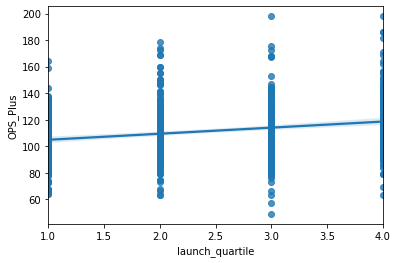

OPS+ model
Predictor: launch angle average
Regression Slope: 1.2448062793361567
R-squared: 0.055352980046875055



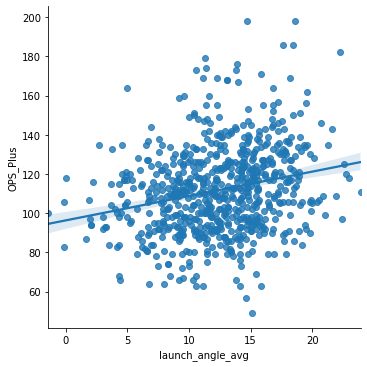

In [114]:
OPS_model_all = LinearRegression().fit(all_data[['launch_quartile']], all_data[['OPS_Plus']])
print('OPS+ model\nPredictor: launch angle average quartile\nRegression Slope: {}\nR-squared: {}\n'.format(OPS_model_all.coef_[0][0], OPS_model_all.score(all_data[['launch_quartile']], all_data[['OPS_Plus']])))

sns.regplot(x="launch_quartile", y="OPS_Plus", data=all_data)
plt.show()

OPS_model_all_2 = LinearRegression().fit(all_data[['launch_angle_avg']], all_data[['OPS_Plus']])
print('OPS+ model\nPredictor: launch angle average\nRegression Slope: {}\nR-squared: {}\n'.format(OPS_model_all_2.coef_[0][0], OPS_model_all_2.score(all_data[['launch_angle_avg']], all_data[['OPS_Plus']])))

sns.lmplot(x="launch_angle_avg", y="OPS_Plus", data=all_data)
plt.show()

xWOBA model
Predictor: launch angle average quartile
Regression Slope: 0.006956956079104106
R-squared: 0.04982629283791551



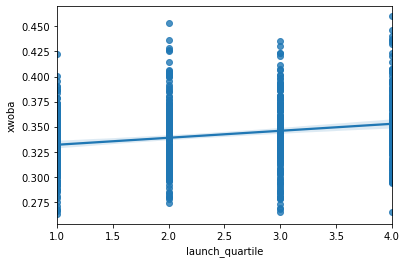

xWOBA model
Predictor: launch angle
Regression Slope: 0.001939215916380131
R-squared: 0.054917438292421905



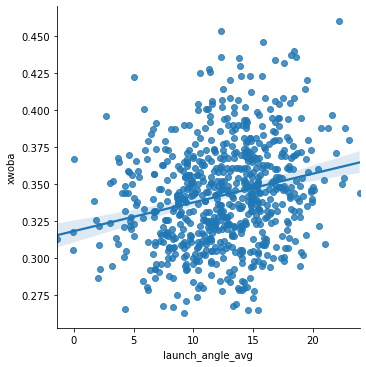

In [115]:
xWOBA_model_all = LinearRegression().fit(all_data[['launch_quartile']], all_data[['xwoba']])
print('xWOBA model\nPredictor: launch angle average quartile\nRegression Slope: {}\nR-squared: {}\n'.format(xWOBA_model_all.coef_[0][0], xWOBA_model_all.score(all_data[['launch_quartile']], all_data[['xwoba']])))

sns.regplot(x="launch_quartile", y="xwoba", data=all_data)
plt.show()

xWOBA_model_all_2 = LinearRegression().fit(all_data[['launch_angle_avg']], all_data[['xwoba']])
print('xWOBA model\nPredictor: launch angle\nRegression Slope: {}\nR-squared: {}\n'.format(xWOBA_model_all_2.coef_[0][0], xWOBA_model_all_2.score(all_data[['launch_angle_avg']], all_data[['xwoba']])))

sns.lmplot(x="launch_angle_avg", y="xwoba", data=all_data)
plt.show()

# Conclusions  
From these analyses, we can conclude that there is a weak positive correlation between launch angle and offensive performance. We also saw that of the ranges of launch angles that we created through quartiles, the positive slope of the regression line shows that as launch angle increases, so does offensive performance. However, the regression scores being so low means that we cannot conclusively say there is a best quartile of average launch angle.
Some weaknesses of this analysis include that we used average launch angle as our predictor. Average launch angle is not a strong statistic because of the different kinds of ways an average can be composed: a player could hit only fly balls and only ground balls, and a player could hit only line drives, and both could end up with the same average launch angle despite compeltely different probiles.
A better way to determine if trying to hit the ball with a certain launch angle might be to determine how succesful the shift in philosophy, from flat or downwards swings to uppercut swings, has been. We could do this by looking at flyball%, the percent of time that a player hits the ball with a launch angle between 25 and 50 degrees, and associating this with offnesive stats, or even with a statistic like xISO, which measures a player's ability to hit for power aside from their general hitting ability.

# End of preregistered analysis

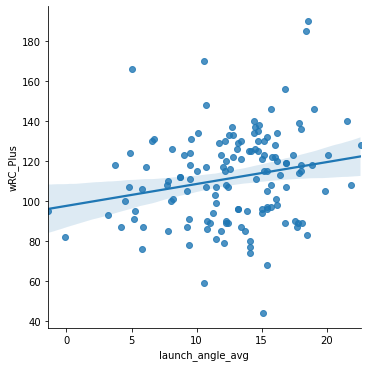

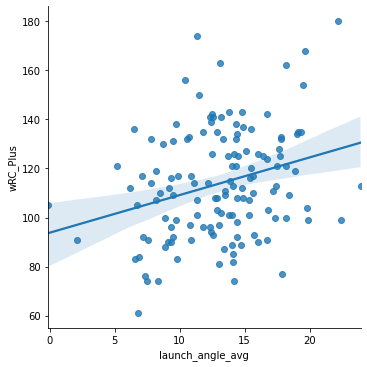

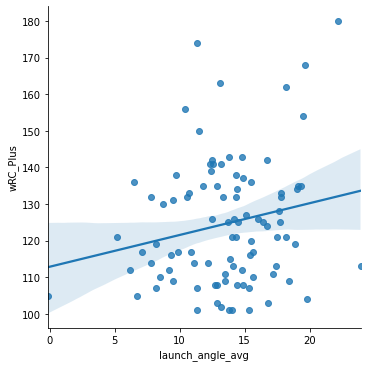

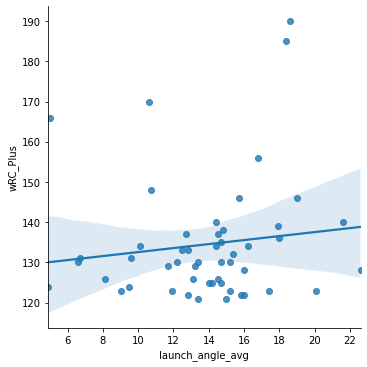

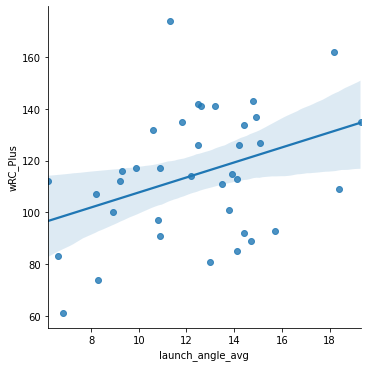

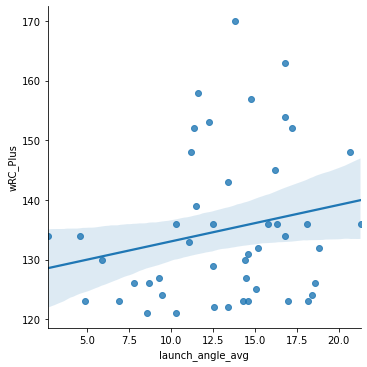

In [104]:
sns.lmplot(x="launch_angle_avg", y="wRC_Plus", data=data_2018)
plt.show()
sns.lmplot(x="launch_angle_avg", y="wRC_Plus", data=data_2019)
plt.show()
sns.lmplot(x="launch_angle_avg", y="wRC_Plus", data=data_2019[data_2019['wRC_Plus'] > 100])
plt.show()
sns.lmplot(x="launch_angle_avg", y="wRC_Plus", data=data_2018[data_2018['wRC_Plus'] > 120])
plt.show()
sns.lmplot(x="launch_angle_avg", y="wRC_Plus", data=data_2019[data_2017['wRC_Plus'] > 120])
plt.show()
sns.lmplot(x="launch_angle_avg", y="wRC_Plus", data=data_2016[data_2016['wRC_Plus'] > 120])
plt.show()

In [105]:
def launch_angle_avg_octile(n):
    if(n >= q0 and n <= q05):
        return 1
    if(n >= q05 and n <=q1):
        return 2
    if(n >= q1 and n <= q15):
        return 3
    if(n >= q15 and n <= q2):
        return 4
    if(n >= q2 and n <= q25):
        return 5
    if(n >= q25 and n <=q3):
        return 6
    if(n >= q3 and n <= q35):
        return 7
    if(n >= q35 and n <= q4):
        return 8

q0 = data_2016['launch_angle_avg'].quantile(0)
q05 = data_2016['launch_angle_avg'].quantile(0.125)
q1 = data_2016['launch_angle_avg'].quantile(0.25)
q15 = data_2016['launch_angle_avg'].quantile(0.375)
q2 = data_2016['launch_angle_avg'].quantile(0.5)
q25 = data_2016['launch_angle_avg'].quantile(0.625)
q3 = data_2016['launch_angle_avg'].quantile(0.75)
q35 = data_2016['launch_angle_avg'].quantile(0.875)
q4 = data_2016['launch_angle_avg'].quantile(1)

dummy_2016_octile = map(launch_angle_avg_octile, data_2016['launch_angle_avg'])
data_2016['launch_octile'] = list(dummy_2016_octile)

#wRC_model_2016_oct = LinearRegression().fit(data_2016[['launch_octile']], data_2016[['wRC_Plus']])
#print('Predictor: launch angle\nRegression Slope: {}\nR-squared: {}\n'.format(wRC_model.coef_[0][0], wRC_model.score(data_2016[['launch_octile']], data_2016[['wRC_Plus']])))

#sns.regplot(x="launch_octile", y="wRC_Plus", data=data_2016);

#sns.lmplot(x="exit_velocity_avg", y="wRC_Plus", hue = 'launch_octile', data=data_2016[data_2016['launch_octile'] == 1]);
#sns.lmplot(x="exit_velocity_avg", y="wRC_Plus", hue = 'launch_octile', data=data_2016[data_2016['launch_octile'] == 2]);
#sns.lmplot(x="exit_velocity_avg", y="wRC_Plus", hue = 'launch_octile', data=data_2016[data_2016['launch_octile'] == 3]);
#sns.lmplot(x="exit_velocity_avg", y="wRC_Plus", hue = 'launch_octile', data=data_2016[data_2016['launch_octile'] == 4]);
#sns.lmplot(x="exit_velocity_avg", y="wRC_Plus", hue = 'launch_octile', data=data_2016[data_2016['launch_octile'] == 5]);
#sns.lmplot(x="exit_velocity_avg", y="wRC_Plus", hue = 'launch_octile', data=data_2016[data_2016['launch_octile'] == 6]);
#sns.lmplot(x="exit_velocity_avg", y="wRC_Plus", hue = 'launch_octile', data=data_2016[data_2016['launch_octile'] == 7]);
#sns.lmplot(x="exit_velocity_avg", y="wRC_Plus", hue = 'launch_octile', data=data_2016[data_2016['launch_octile'] == 8]);

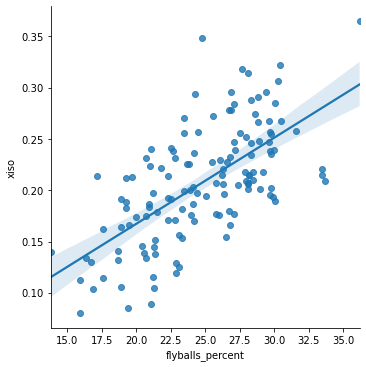

Predictor: flyball percent
Regression Slope: 0.008396772644929936
R-squared: 0.4238839813765234



In [106]:
sns.lmplot(x="flyballs_percent", y="xiso", data=data_2019)
plt.show()

flyballs_model_2019 = LinearRegression().fit(data_2019[['flyballs_percent']], data_2019[['xiso']])
print('Predictor: flyball percent\nRegression Slope: {}\nR-squared: {}\n'.format(flyballs_model_2019.coef_[0][0], flyballs_model_2019.score(data_2019[['flyballs_percent']], data_2019[['xiso']])))

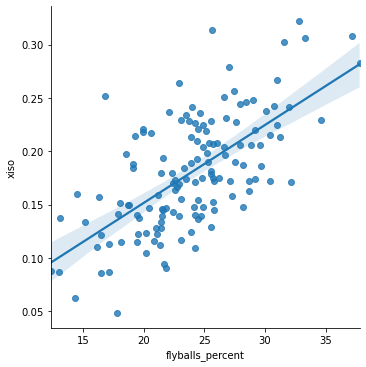

Predictor: flyball percent
Regression Slope: 0.007302346855667315
R-squared: 0.425183460899075



In [107]:
sns.lmplot(x="flyballs_percent", y="xiso", data=data_2018)
plt.show()

flyballs_model_2018 = LinearRegression().fit(data_2018[['flyballs_percent']], data_2018[['xiso']])
print('Predictor: flyball percent\nRegression Slope: {}\nR-squared: {}\n'.format(flyballs_model_2018.coef_[0][0], flyballs_model_2018.score(data_2018[['flyballs_percent']], data_2018[['xiso']])))

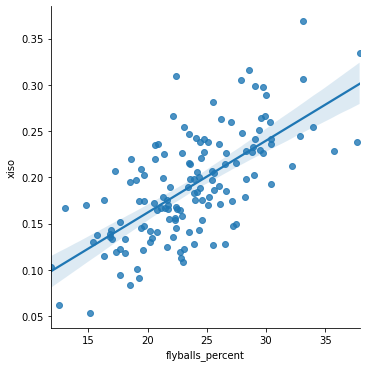

Predictor: flyball percent
Regression Slope: 0.007776722815256618
R-squared: 0.4534453583323734



In [108]:
sns.lmplot(x="flyballs_percent", y="xiso", data=data_2017)
plt.show()

flyballs_model_2017 = LinearRegression().fit(data_2017[['flyballs_percent']], data_2017[['xiso']])
print('Predictor: flyball percent\nRegression Slope: {}\nR-squared: {}\n'.format(flyballs_model_2017.coef_[0][0], flyballs_model_2017.score(data_2017[['flyballs_percent']], data_2017[['xiso']])))

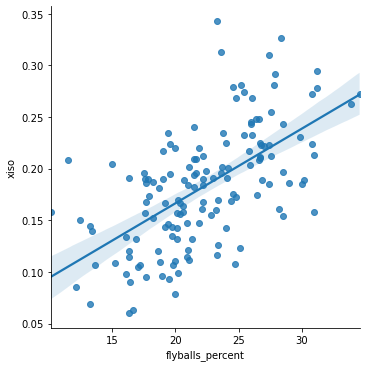

Predictor: flyball percent
Regression Slope: 0.007212659476237146
R-squared: 0.3664535143326877



In [109]:
sns.lmplot(x="flyballs_percent", y="xiso", data=data_2016)
plt.show()

flyballs_model_2016 = LinearRegression().fit(data_2016[['flyballs_percent']], data_2016[['xiso']])
print('Predictor: flyball percent\nRegression Slope: {}\nR-squared: {}\n'.format(flyballs_model_2016.coef_[0][0], flyballs_model_2016.score(data_2016[['flyballs_percent']], data_2016[['xiso']])))

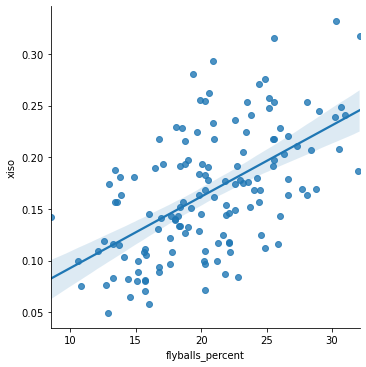

Predictor: flyball percent
Regression Slope: 0.006915478744005283
R-squared: 0.32682584226020217



In [110]:
sns.lmplot(x="flyballs_percent", y="xiso", data=data_2015)
plt.show()

flyballs_model_2015 = LinearRegression().fit(data_2015[['flyballs_percent']], data_2015[['xiso']])
print('Predictor: flyball percent\nRegression Slope: {}\nR-squared: {}\n'.format(flyballs_model_2015.coef_[0][0], flyballs_model_2015.score(data_2015[['flyballs_percent']], data_2015[['xiso']])))

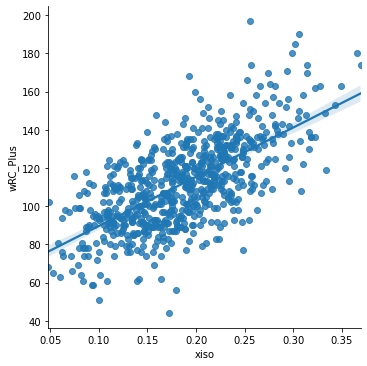

wRC+ model
Predictor: xiso
Regression Slope: 257.9467533373635
R-squared: 0.46587118593961185



In [111]:
sns.lmplot(x="xiso", y="wRC_Plus", data=all_data)
plt.show()

xiso_all = LinearRegression().fit(all_data[['xiso']], all_data[['wRC_Plus']])
print('wRC+ model\nPredictor: xiso\nRegression Slope: {}\nR-squared: {}\n'.format(xiso_all.coef_[0][0], xiso_all.score(data_2015[['xiso']], data_2015[['wRC_Plus']])))

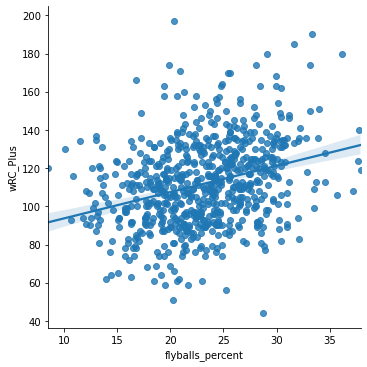

wRC+ model
Predictor: flyball percent
Regression Slope: 1.3757463729312396
R-squared: 0.0921091020365915



In [112]:
sns.lmplot(x="flyballs_percent", y="wRC_Plus", data=all_data)
plt.show()

flyballs_model_all = LinearRegression().fit(all_data[['flyballs_percent']], all_data[['wRC_Plus']])
print('wRC+ model\nPredictor: flyball percent\nRegression Slope: {}\nR-squared: {}\n'.format(flyballs_model_all.coef_[0][0], flyballs_model_all.score(all_data[['flyballs_percent']], all_data[['wRC_Plus']])))

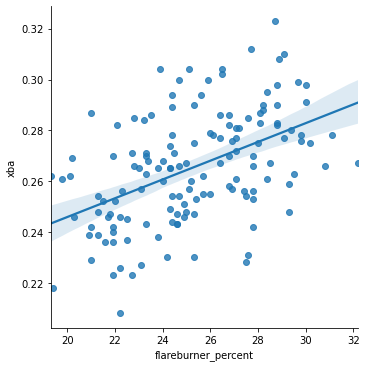

Predictor: flareburner%
Regression Slope: 0.0036932246108991253
R-squared: -1.5991471078773865



In [113]:
sns.lmplot(x="flareburner_percent", y="xba", data=data_2015)
plt.show()

flareburner_model_2015 = LinearRegression().fit(data_2015[['flareburner_percent']], data_2015[['xba']])
print('Predictor: flareburner%\nRegression Slope: {}\nR-squared: {}\n'.format(flareburner_model_2015.coef_[0][0], flareburner_model_2015.score(data_2015[['flyballs_percent']], data_2015[['xiso']])))